# **Ride-Sharing Data Analysis and Pricing Prediction**
Team11: Ching-Hsuan (Shawn) Lin, Yu-Hsiang (Rick) Wang, Ming-Hua (Jasmine) Tsai, Kuang-Ching (Amanda) Ting

Colab Link: https://colab.research.google.com/drive/1eSQ6pl8JXW55OCz7r7FASIp_eYXsXVDo#scrollTo=esjWSGkAjRWb

## Introduction & Motivation

According to government data, 34% of Boston households do not own a car, highlighting the significant market potential for ride-sharing services in the area. This project focuses on analyzing Boston's ride-sharing data during the winter season to uncover the factors that affect pricing for platforms like Lyft and Uber. Our goal is to design a pricing prediction system tailored to the specific conditions of the winter season, offering valuable insights for both ride-sharing providers and users.

## Data Source
Link: https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma

The dataset from Kaggle contains 57 columns and 693071 rows with date time, numeric, categorical, and text data types, and it includes ride factors and prices in Boston during the winter of 2018.  

| **Column Title**              | **Description**                                                                                   |
|--------------------------------|---------------------------------------------------------------------------------------------------|
| **id**                        | Unique identifier for each ride.                                                                  |
| **timestamp**                 | The exact timestamp when the ride occurred.                                                      |
| **hour**                      | The hour of the day when the ride occurred (0–23).                                               |
| **day**                       | The day of the month when the ride occurred (1–31).                                              |
| **month**                     | The month of the year when the ride occurred (1–12).                                             |
| **datetime**                  | Full date and time information for the ride.                                                     |
| **timezone**                  | The timezone of the location where the ride occurred.                                            |
| **source**                    | The starting location of the ride.                                                               |
| **destination**               | The ending location of the ride.                                                                 |
| **cab_type**                  | The type of cab service (Uber or Lyft).                                                          |
| **product_id**                | Identifier for ride types.                                                                       |
| **name**                      | Visible name of the ride type (e.g., UberX, Lyft Lux).                                           |
| **price**                     | The cost of the ride in USD.                                                                     |
| **distance**                  | The distance of the ride in miles.                                                               |
| **surge_multiplier**          | The surge pricing multiplier applied to the ride.                                                |
| **latitude**                  | The geographic latitude of the pickup location.                                                  |
| **longitude**                 | The geographic longitude of the pickup location.                                                 |
| **temperature**               | The temperature at the time of the ride (F).                                                    |
| **apparentTemperature**       | The "feels like" temperature at the time of the ride (F).                                        |
| **short_summary**             | A brief description of the weather conditions (e.g., clear, rainy).                              |
| **long_summary**              | A detailed description of the weather conditions.                                                |
| **precipIntensity**           | The intensity of precipitation at the time of the ride.                                          |
| **precipProbability**         | The probability of precipitation occurring.                                                      |
| **humidity**                  | The relative humidity during the ride.                                                          |
| **windSpeed**                 | The wind speed at the time of the ride.                                                          |
| **windGust**                  | The maximum wind gust speed recorded.                                                            |
| **windGustTime**              | The time when the maximum wind gust occurred.                                                    |
| **visibility**                | The visibility distance at the time of the ride.                                                 |
| **temperatureHigh**           | The highest temperature recorded on that day (F).                                               |
| **temperatureHighTime**       | The time when the highest temperature occurred.                                                  |
| **temperatureLow**            | The lowest temperature recorded on that day (F).                                                |
| **temperatureLowTime**        | The time when the lowest temperature occurred.                                                   |
| **apparentTemperatureHigh**   | The highest "feels like" temperature on that day (F).                                            |
| **apparentTemperatureHighTime** | The time when the highest "feels like" temperature occurred.                                     |
| **apparentTemperatureLow**    | The lowest "feels like" temperature on that day (F).                                             |
| **apparentTemperatureLowTime** | The time when the lowest "feels like" temperature occurred.                                      |
| **icon**                      | A symbolic representation of the weather (e.g., sunny, cloudy).                                  |
| **dewPoint**                  | The temperature at which dew forms, indicating humidity levels.                                  |
| **pressure**                  | The atmospheric pressure at the time of the ride.                                                |
| **windBearing**               | The direction of the wind in degrees.                                                            |
| **cloudCover**                | The fraction of the sky covered by clouds.                                                       |
| **uvIndex**                   | The ultraviolet (UV) index during the ride.                                                     |
| **visibility.1**              | Duplicate visibility column showing distance at the time of the ride.                            |
| **ozone**                     | The concentration of ozone in the atmosphere.                                                   |
| **sunriseTime**               | The time of sunrise on that day.                                                                 |
| **sunsetTime**                | The time of sunset on that day.                                                                  |
| **moonPhase**                 | The phase of the moon on that day (e.g., full moon, new moon).                                   |
| **precipIntensityMax**        | The maximum precipitation intensity recorded on that day.                                        |
| **uvIndexTime**               | The time when the highest UV index occurred.                                                    |
| **temperatureMin**            | The minimum temperature recorded on that day (F).                                               |
| **temperatureMinTime**        | The time when the minimum temperature occurred.                                                  |
| **temperatureMax**            | The maximum temperature recorded on that day (F).                                               |
| **temperatureMaxTime**        | The time when the maximum temperature occurred.                                                  |
| **apparentTemperatureMin**    | The lowest "feels like" temperature on that day (F).                                             |
| **apparentTemperatureMinTime** | The time when the lowest "feels like" temperature occurred.                                      |
| **apparentTemperatureMax**    | The highest "feels like" temperature on that day (F).                                            |
| **apparentTemperatureMaxTime** | The time when the highest "feels like" temperature occurred.                                     |


## Data Loading and Cleaning

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

from google.cloud import storage
import pandas as pd
import os

df = pd.read_csv('drive/MyDrive/BA810/rideshare_kaggle.csv')


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [ ]:
print(df.head())

                                     id     timestamp  hour  day  month  \
0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1  4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2  981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3  c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4  e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   

              datetime          timezone            source    destination  \
0  2018-12-16 09:30:07  America/New_York  Haymarket Square  North Station   
1  2018-11-27 02:00:23  America/New_York  Haymarket Square  North Station   
2  2018-11-28 01:00:22  America/New_York  Haymarket Square  North Station   
3  2018-11-30 04:53:02  America/New_York  Haymarket Square  North Station   
4  2018-11-29 03:49:20  America/New_York  Haymarket Square  North Station   

  cab_type  ... precipIntensityMax uvIndexTime  temperatureMin  \
0     Lyft  ...     

In [ ]:
#check null value
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [ ]:
# remove not useful column
df_draw = df
df = df.drop(columns = ['id', 'datetime', 'timezone', 'long_summary'])
df_clean = df.dropna()

In [ ]:
df_clean.isnull().sum()

,0
timestamp,0
hour,0
day,0
month,0
source,0
destination,0
cab_type,0
product_id,0
name,0
price,0


## EDA

### Correlation Heatmap

In [ ]:
df_draw = df_draw.dropna()

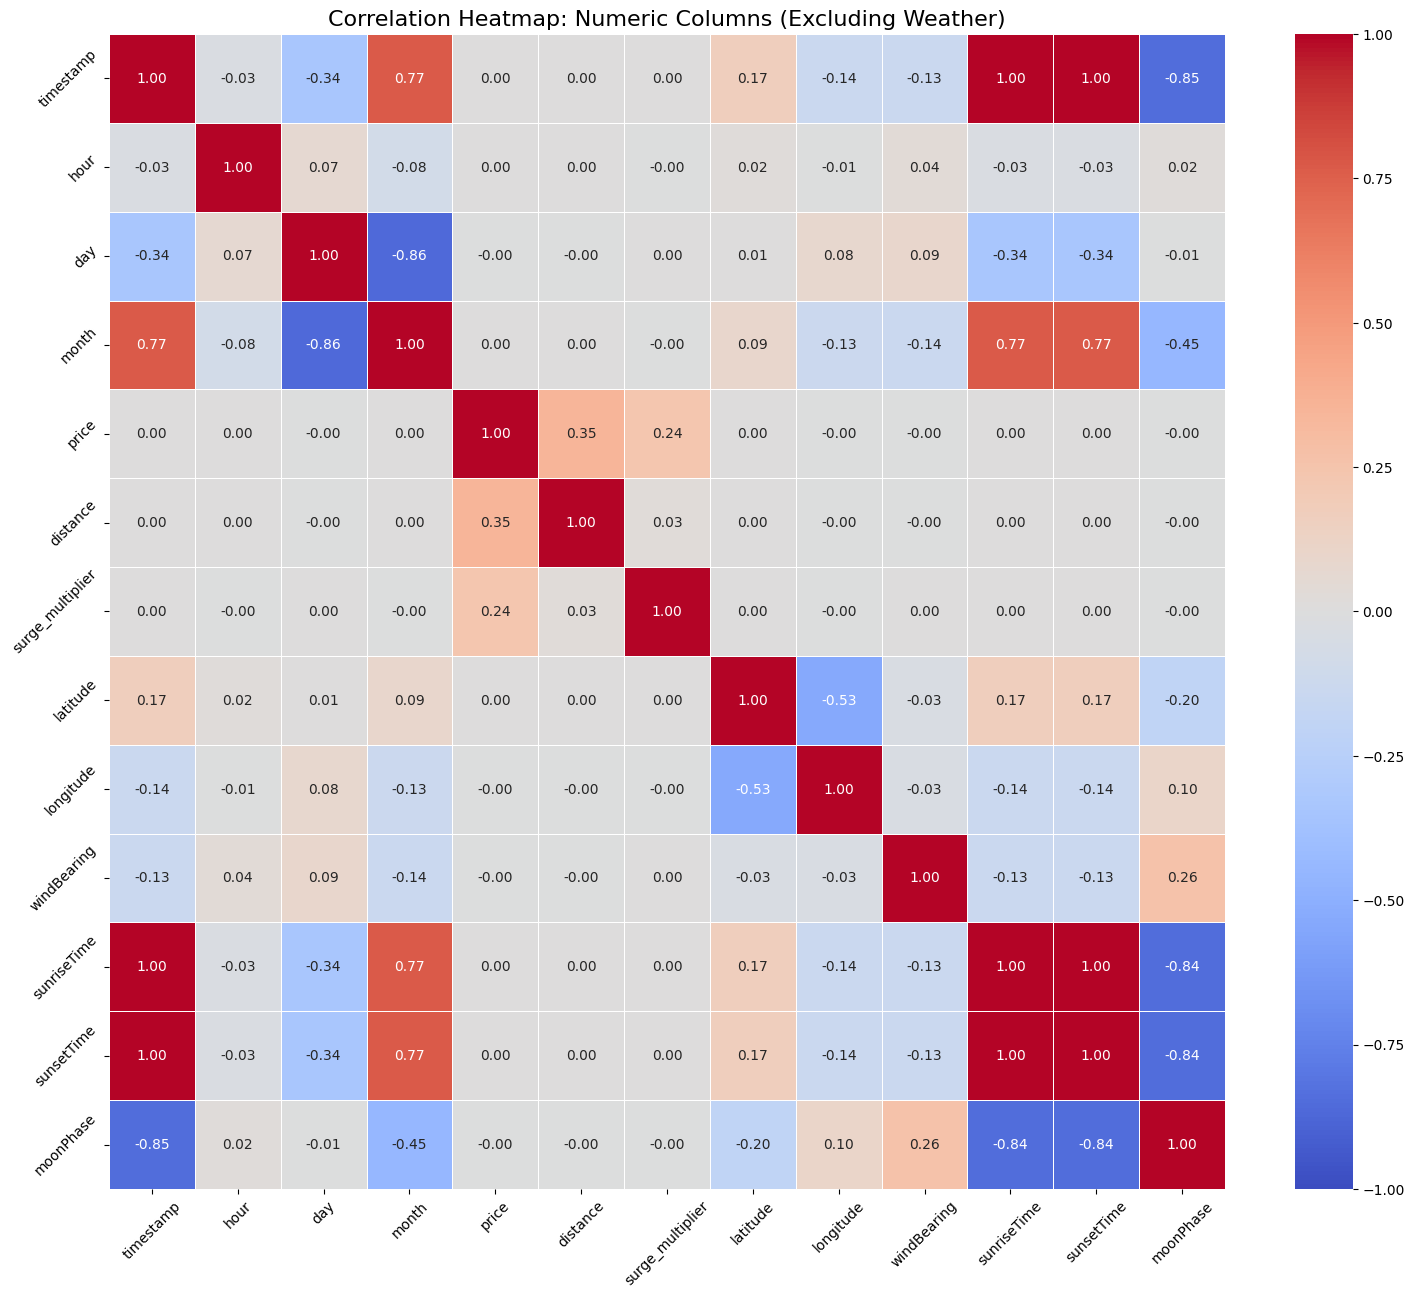

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Define weather-related columns to drop
weather_columns_to_drop = [
    'temperature', 'apparentTemperature', 'short_summary', 'precipIntensity',
    'precipProbability', 'humidity', 'windSpeed', 'windGust', 'windGustTime',
    'visibility', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow',
    'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime',
    'apparentTemperatureLow', 'apparentTemperatureLowTime', 'dewPoint', 'pressure',
    'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'precipIntensityMax',
    'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax',
    'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime',
    'apparentTemperatureMax', 'apparentTemperatureMaxTime'
]


# Drop the weather-related columns
df_draw = df_draw.drop(columns=weather_columns_to_drop, errors='ignore')


# Select all numeric columns directly
numeric_columns = df_draw.select_dtypes(include=['number'])


# Calculate the correlation matrix for the remaining numeric columns
correlation_matrix = numeric_columns.corr()


# Plot the heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    vmin=-1,
    vmax=1
)
plt.title('Correlation Heatmap: Numeric Columns (Excluding Weather)', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


The correlation heatmap reveals a moderate positive correlation (0.35) between price and distance, indicating that longer rides tend to have higher prices, as expected. Additionally, price shows a slightly weaker positive correlation (0.24) with surge_multiplier, reflecting that higher surge pricing often results in increased ride costs. This relationship highlights the impact of dynamic pricing during periods of high demand but also suggests that the surge multiplier alone does not fully account for price variations.

### Trend in Ride Prices: Hourly and Weekly Perspective

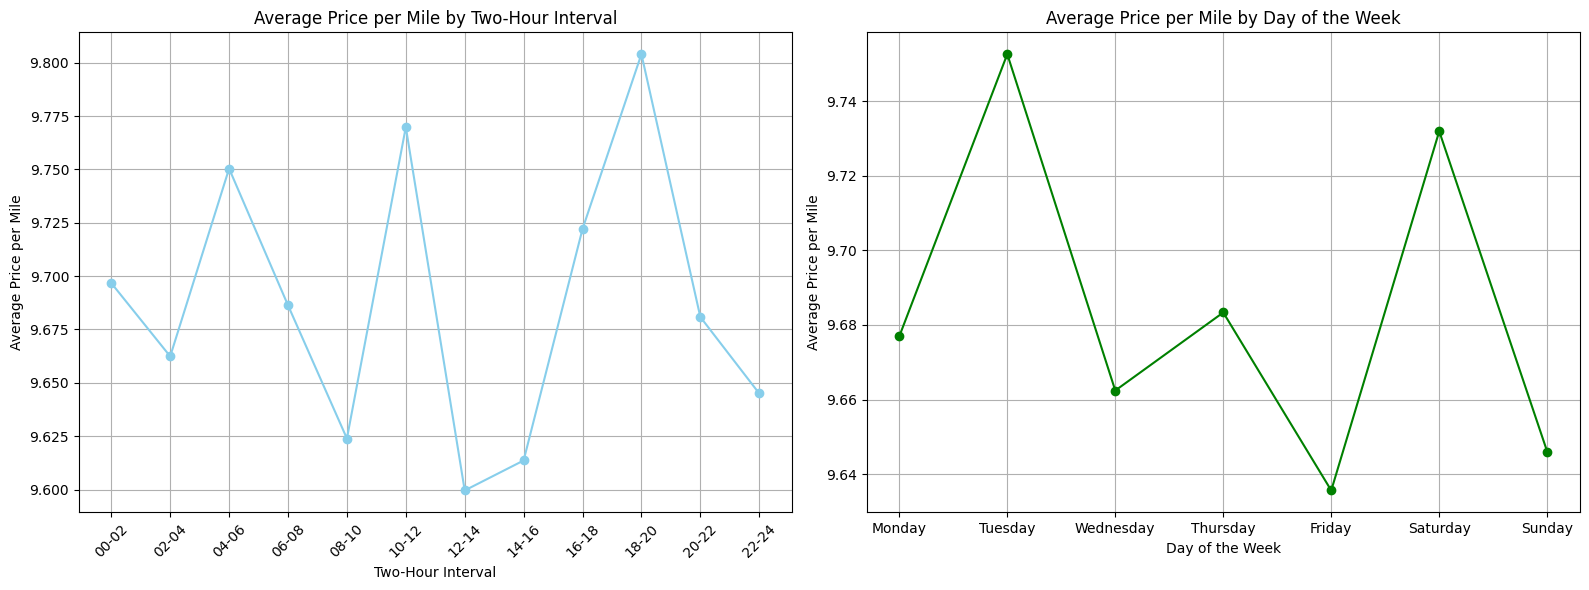

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


# Ensure the required columns exist
if 'price' in df_draw.columns and 'distance' in df_draw.columns:
   # Remove rows with missing values for price or distance
   df_draw = df_draw.dropna(subset=['price', 'distance'])

   # Avoid division by zero (filter out rides with zero distance)
   df_draw = df_draw[df_draw['distance'] > 0]

   # Calculate price per mile
   df_draw['price_per_mile'] = df_draw['price'] / df_draw['distance']

   # Plot 1: Average Price per Mile by Two-Hour Interval
   # Create a two-hour interval column
   df_draw['hour_interval'] = (df_draw['hour'] // 2) * 2  # Group by two-hour intervals
   df_draw['hour_interval_label'] = df_draw['hour_interval'].astype(str).str.zfill(2) + '-' + (df_draw['hour_interval'] + 2).astype(str).str.zfill(2)

   # Group data by two-hour intervals and calculate average price per mile
   hourly_avg_price_per_mile = df_draw.groupby('hour_interval_label')['price_per_mile'].mean()
   hourly_avg_price_per_mile = hourly_avg_price_per_mile.sort_index()

   # Plot 2: Average Price per Mile by Day of the Week
   # Convert datetime to day of the week
   df_draw['day_of_week'] = pd.to_datetime(df_draw['datetime']).dt.day_name()

   # Group data by day of the week and calculate average price per mile
   weekly_avg_price_per_mile = df_draw.groupby('day_of_week')['price_per_mile'].mean()
   days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
   weekly_avg_price_per_mile = weekly_avg_price_per_mile.reindex(days_order)

   # Create subplots
   fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

   # Plot 1: Hourly intervals
   axes[0].plot(hourly_avg_price_per_mile, marker='o', color='skyblue')
   axes[0].set_title('Average Price per Mile by Two-Hour Interval')
   axes[0].set_xlabel('Two-Hour Interval')
   axes[0].set_ylabel('Average Price per Mile')
   axes[0].tick_params(axis='x', rotation=45)
   axes[0].grid(True)

   # Plot 2: Day of the week
   axes[1].plot(weekly_avg_price_per_mile, marker='o', color='green')
   axes[1].set_title('Average Price per Mile by Day of the Week')
   axes[1].set_xlabel('Day of the Week')
   axes[1].set_ylabel('Average Price per Mile')
   axes[1].grid(True)

   # Show the plots
   plt.tight_layout()
   plt.show()

else:
   print("Columns 'price' and 'distance' are required for normalization, but one or both are missing.")


The two graphs reveal key insights into ride-hailing pricing trends. The average price per mile fluctuates significantly throughout the day, with peaks during high-demand periods such as 10:00-12:00 and 18:00-20:00, while the lowest prices occur during 08:00-10:00 and 12:00-14:00, likely reflecting lower demand during mid-morning and early afternoon. Interestingly, despite high ride volume on Fridays, the average price per mile is lower compared to other days, possibly due to increased ride availability and competitive pricing that reduces surge effects. In contrast, prices are slightly higher on Tuesdays, likely driven by weekday commuting, and on Saturdays, reflecting weekend social activities. Sundays show consistently lower prices, which may be attributed to reduced demand. These findings suggest that riders can save by traveling during off-peak times, while ride-hailing companies could explore strategies to maximize profitability during high-demand yet lower-priced periods, such as Fridays.

### Average Price by Distance

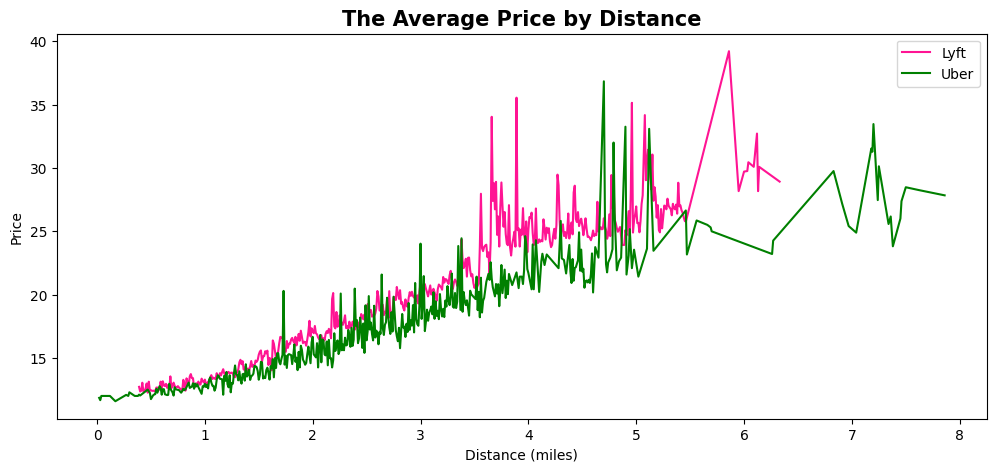

In [ ]:
# Plotting distance against price
fig, ax = plt.subplots(figsize=(12, 5))


# Lyft: Group by distance and calculate average price
lyft_avg_price = df_clean[df_clean['cab_type'] == 'Lyft'].groupby('distance').price.mean()
ax.plot(lyft_avg_price.index, lyft_avg_price, label='Lyft', color='deeppink')


# Uber: Group by distance and calculate average price
uber_avg_price = df_clean[df_clean['cab_type'] == 'Uber'].groupby('distance').price.mean()
ax.plot(uber_avg_price.index, uber_avg_price, label='Uber', color='green')


# Add title, labels, and legend
ax.set_title('The Average Price by Distance', fontsize=15, fontweight='bold')
ax.set(xlabel='Distance (miles)', ylabel='Price')
ax.legend()


# Show plot
plt.show()

This graph shows the average price of rides as a function of distance(in miles) for two ride-hailing services, Lytf and Uber. The two lines, colored pink for lyft and green for Uber, represent how the average price change as the distance increase. Lyft’s data seems to be limited to a maximum distance of around 6 miles, while Uber has extending beyond 7 miles. At shorter distances, Lyft and Uber prices are fairly close, often overlapping. As distance increases, there appears to be greater divergence, with Uber prices occasionally spiking higher than Lyft.

### Compare Price by Uber and Lyft Ride Type

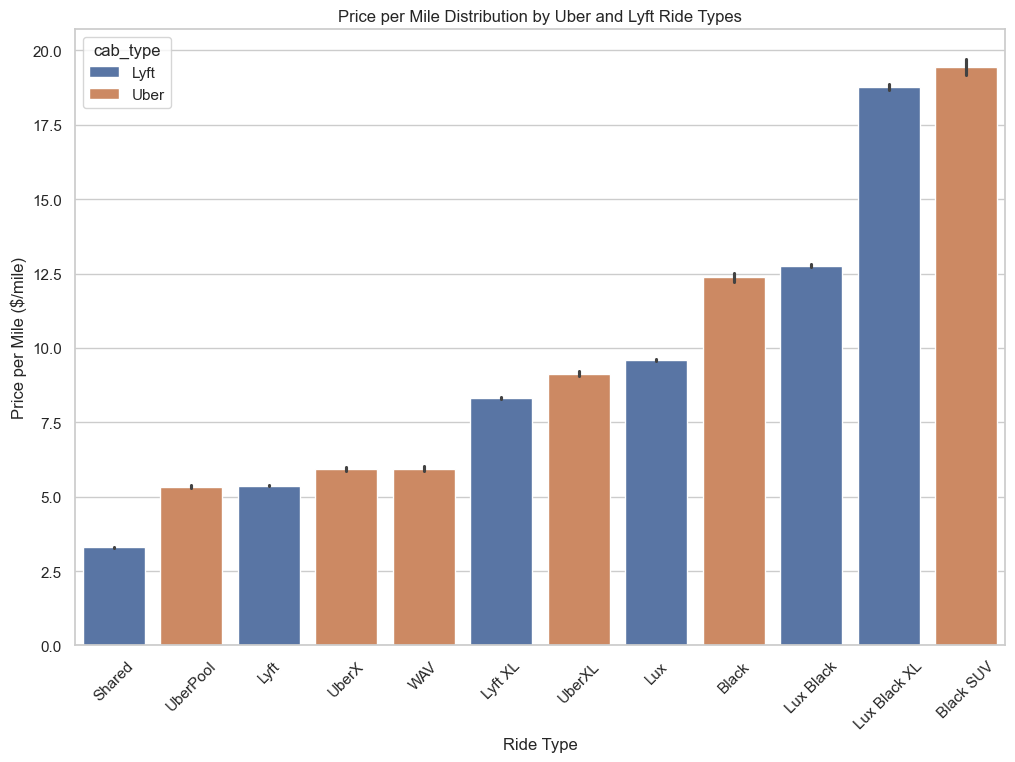

In [ ]:
df2 = df_clean[['cab_type', 'name', 'distance', 'price']]
df2['price_per_mile'] = df['price'] / df['distance']
sns.set(style='whitegrid')
plt.figure(figsize=(12, 8))
order = ['Shared', 'UberPool', 'Lyft', 'UberX', 'WAV', 'Lyft XL', 'UberXL', 'Lux', 'Black', 'Lux Black', 'Lux Black XL', 'Black SUV', ]
sns.barplot(data=df2, x='name', y='price_per_mile', order=order, hue='cab_type')


plt.xlabel('Ride Type')
plt.xticks(rotation=45)
plt.ylabel('Price per Mile ($/mile)')
plt.title('Price per Mile Distribution by Uber and Lyft Ride Types')
plt.show()


The bar plot compares the price per mile for various ride types offered by Uber and Lyft.
Shared rides, such as Lyft Shared and UberPool, have the lowest price per mile, catering to cost-conscious riders willing to share their journey with others.

Standard rides, including Lyft, UberX, and WAV (Wheelchair Accessible Vehicle), fall into the mid-tier price range, offering a balance between cost and convenience. These options appeal to most riders looking for affordable yet private transportation. Both companies offer similar pricing in this category, reflecting competitive strategies. Luxury and premium ride options, such as Uber Black, Uber Black SUV, Lyft Lux, and Lyft Lux Black, have significantly higher prices per mile, nearly triple those of standard rides. These services cater to customers prioritizing exclusivity and comfort, often targeting professionals or special occasions. Uber’s premium rides, like Black SUV and Black XL, slightly outprice Lyft’s Lux Black XL, signaling an emphasis on high-income clientele in the luxury segment.

### Compare Ride Counts and Average Prices across Different Temperature Ranges

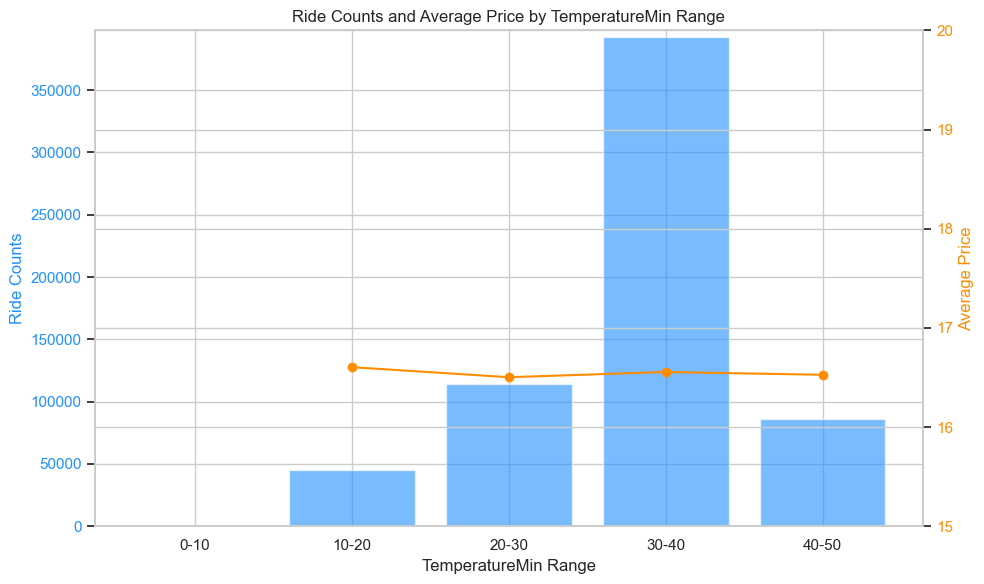

In [ ]:
# Create temperature range categories
bins = [0, 10, 20, 30, 40, 50]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50']


# Add temperature range column
df_clean['temp_range'] = pd.cut(df_clean['temperatureMin'], bins=bins, labels=labels, right=False)


# Prepare data for TemperatureMin Range
ride_counts = df_clean.groupby('temp_range')['price'].count()
average_price = df_clean.groupby('temp_range')['price'].mean()


# Set consistent y-axis limits
left_y_lim = (0, ride_counts.max() + 5000)  # Adjusting for some padding
right_y_lim = (15, 20)  # Adjust as needed for average price


# Create plot
fig, ax = plt.subplots(figsize=(10, 6))


# Plot ride counts (bar chart)
ax.bar(ride_counts.index.astype(str), ride_counts.values, color='dodgerblue', alpha=0.6, label='Ride Counts')
ax.set_xlabel('TemperatureMin Range')
ax.set_ylabel('Ride Counts', color='dodgerblue')
ax.tick_params(axis='y', labelcolor='dodgerblue')
ax.set_ylim(left_y_lim)  # Set consistent left y-axis limits


# Plot average price (line chart)
ax_twin = ax.twinx()
ax_twin.plot(ride_counts.index.astype(str), average_price.values, color='darkorange', marker='o', label='Average Price')
ax_twin.set_ylabel('Average Price', color='darkorange')
ax_twin.tick_params(axis='y', labelcolor='darkorange')
ax_twin.set_ylim(right_y_lim)  # Set consistent right y-axis limits


# Set title
ax.set_title('Ride Counts and Average Price by TemperatureMin Range')


# Show plot
plt.tight_layout()
plt.show()


This chart shows that ride counts peak in the 30-40°F range, suggesting moderate winter temperatures encourage more ride-sharing. However, ride counts drop significantly in extreme cold (0-10°F) and milder temperatures (40-50°F). Despite these shifts, average pricing remains stable between 16 and 18, indicating that demand changes are not heavily reflected in pricing strategies.

## Split Dataset

In [ ]:
# Split data
from sklearn.model_selection import train_test_split
dx = df_clean.drop('price', axis=1) # separate X ...
dy = df_clean['price'].copy()       # from y
dx_train, dx_test, dy_train, dy_test = train_test_split(dx, dy, test_size = .2, random_state=42) #split all

## Transformation Pipeline

Since using a OneHotEncoder here would expand the number of columns to more than 100, significantly reducing the efficiency of subsequent modeling and feature selection, we decided to use a LabelEncoder instead.

In [ ]:

import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn import set_config
set_config(display='diagram') # shows the pipeline graphically when printed

label_columns = ['source', 'destination', 'cab_type', 'product_id', 'name', 'short_summary']
# apply Label Encoding to categorical columns
label_encoder = LabelEncoder()
for col in label_columns:
    dx_train[col] = label_encoder.fit_transform(dx_train[col])
    dx_test[col] = label_encoder.fit_transform(dx_test[col])


prep_pipeline = ColumnTransformer([
    ('num', StandardScaler(), make_column_selector(dtype_include=np.number))
])
dx_train_prepd = prep_pipeline.fit_transform(dx_train)

# preprocess the X_test as well
dx_test_prepd = prep_pipeline.transform(dx_test)
prep_pipeline

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000002588334BED0>)])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

## Preliminary Evaluation

Before performing feature selection, we first built model to use as a benchmark. This approach helps us better assess whether feature selection provides any improvements.

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(dx_train_prepd, dy_train)
pred_lin = lin_reg.predict(dx_test_prepd)
rmse = mean_squared_error(dy_test, pred_lin, squared=False)


    # Evaluate clf's accuracy on the test set
print("Linear Regressor's Root Mean Squared Error:", rmse)


Linear Regressor's Root Mean Squared Error: 6.274741090282146


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(dx_train_prepd, dy_train)
pred_rf = rf_reg.predict(dx_test_prepd)
rmse = mean_squared_error(dy_test, pred_rf, squared=False)


    # Evaluate clf's accuracy on the test set
print("Random Forest Regressor's Root Mean Squared Error:", rmse)

Random Forest Regressor's Root Mean Squared Error: 1.8204232290593767


The results indicate that the Random Forest Regressor significantly outperforms the Linear Regression model in predicting pricing. The Root Mean Squared Error (RMSE) for the Random Forest Regressor is 1.82, compared to the higher RMSE of 6.27 for the Linear Regressor, demonstrating its superior accuracy.
We also attempted to run the Support Vector Machine (SVM) model. However, due to the high computational expense associated with SVM on this large dataset, we were unable to obtain results within a reasonable timeframe. This highlights the need for computational efficiency when selecting models for large datasets.

## Feature Selection with `SelectKBest`

We first used SelectKBest for feature selection.
Although this method cannot capture interactions between variables, it is the fastest option, making it well-suited for our relatively large dataset.

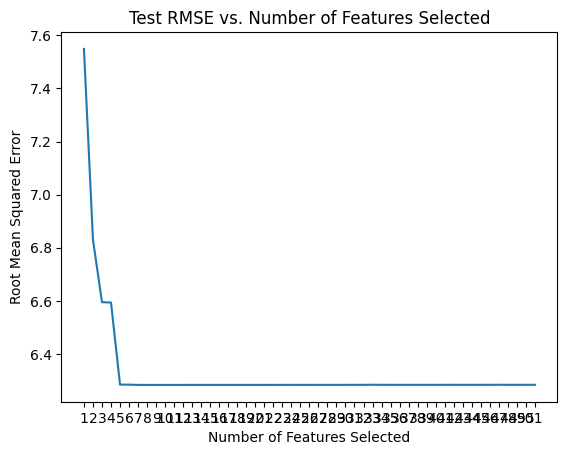

,param_select__k,mean_test_score
6,7,-6.283188
9,10,-6.283215
10,11,-6.283217
8,9,-6.283223
7,8,-6.283224


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
k_best_pipe = Pipeline([
    ('select', SelectKBest(score_func=f_regression)),
    ('model', LinearRegression()) # This is not strictly necessary for feature selection.
])

param_grid = {
    'select__k': range(1, dx_train_prepd.shape[1] + 1)
}

grid_search = GridSearchCV(k_best_pipe, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(dx_train_prepd, dy_train)


# Examine the results
cv_res = pd.DataFrame(grid_search.cv_results_)
plt.plot(cv_res["param_select__k"], -cv_res["mean_test_score"])
plt.xlabel("Number of Features Selected")
plt.ylabel("Root Mean Squared Error")
plt.title("Test RMSE vs. Number of Features Selected")
plt.xticks(np.arange(min(cv_res["param_select__k"]), max(cv_res["param_select__k"]) + 1, 1))
plt.show()

display(cv_res.sort_values(by="mean_test_score", ascending=False).filter(regex = '(^param_|mean_test_score)', axis=1).head())

best_model = grid_search.best_estimator_
#print(f'\nThe selected features are {best_model["prep"].get_feature_names_out()[best_model["select"].get_support()]}')
# Not easy to extract selected feature names inside the pipeline. We get the columns produced by
# "prep" step before "select" and use the 0/1 indices of used columns from the "select" step to
# print them.

In [ ]:
#Select the best result's features and apply to the data
best_k_best = grid_search.best_estimator_.named_steps['select']


dx_train_selected = best_k_best.transform(dx_train_prepd)
dx_test_selected = best_k_best.transform(dx_test_prepd)

### Model Evaluation with Selected Features by `SelectKBest`


In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(dx_train_selected, dy_train)
pred_lin = lin_reg.predict(dx_test_selected)
rmse = mean_squared_error(dy_test, pred_lin, squared=False)


    # Evaluate clf's accuracy on the test set
print("Linear Regressor's Root Mean Squared Error:", rmse)

Linear Regressor's Root Mean Squared Error: 6.274411672381347


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(dx_train_selected, dy_train)
pred_rf = rf_reg.predict(dx_test_selected)
rmse = mean_squared_error(dy_test, pred_rf, squared=False)


    # Evaluate clf's accuracy on the test set
print("Random Forest Regressor's Root Mean Squared Error:", rmse)

Random Forest Regressor's Root Mean Squared Error: 1.6251478035728615


In [ ]:
svm_reg = SVR()
svm_reg.fit(dx_train_selected, dy_train)
pred_svm = svm_reg.predict(dx_test_selected)
rmse = mean_squared_error(dy_test, pred_svm, squared=False)


    # Evaluate clf's accuracy on the test set
print("SVM's Root Mean Squared Error:", rmse)

SVM's Root Mean Squared Error: 2.242568109109572


The results from these models, evaluated with features selected using SelectKBest, show notable improvements in performance compared to the earlier results. The Random Forest Regressor achieves the best performance with a RMSE of 1.63, slightly better than its RMSE of 1.82 in the previous evaluation. The SVM model, which we were previously unable to evaluate due to computational constraints, was successfully run on the selected features, yielding an RMSE of 2.24, making it more accurate than the Linear Regressor but less so than the Random Forest model.The Linear Regression model continues to perform poorly, with an RMSE of 6.2. However, after the feature selection process, the model construction runtime of SVM exceeded 400 minutes, whereas Random Forest completed the task in just 42 seconds. The significant difference in computational cost led us to choose Random Forest for hyperparameter tuning. Considering the time and cost constraints, we decided not to include SVM in further comparisons.

### Hyper Parameters Tuning

#### GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
rfm_para_grid = {
    'max_features' : ['sqrt', 'log2', None],
    'n_estimators' : np.arange(10, 201, 30),
    'min_samples_leaf' : np.arange(1, 50, 10)
    }
grid_search = GridSearchCV(RandomForestRegressor(), rfm_para_grid, scoring='neg_root_mean_squared_error', cv = 3)
grid_search.fit(dx_train_selected, dy_train)
print('\n\nThe best parameters are ', grid_search.best_params_)

grid_cv_res = pd.DataFrame(grid_search.cv_results_) # convert to DF for convenience
print(grid_cv_res.columns)
grid_cv_res.sort_values(by ='mean_test_score', ascending=False, inplace=True)  # sort the data frame
# select only the columns that start with 'param_' and the column 'mean_test_score'
grid_cv_res.filter(regex = '(^param_|mean_test_score)', axis=1).head()



The best parameters are  {'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 130}
Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_features', 'param_min_samples_leaf', 'param_n_estimators',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score'],
      dtype='object')


,param_max_features,param_min_samples_leaf,param_n_estimators,mean_test_score
39,log2,1,130,-1.648096
5,sqrt,1,160,-1.648116
41,log2,1,190,-1.648209
40,log2,1,160,-1.648309
6,sqrt,1,190,-1.648315


#### HalvingGridSearch

In [ ]:
from sklearn.experimental import enable_halving_search_cv # needed to enable Halving features
from sklearn.model_selection import HalvingGridSearchCV
rfm_para_grid = {'max_features' : ['sqrt', 'log2', None],
                 #'max_depth':np.arange(1, 20),
                 'n_estimators' : np.arange(10, 201, 30),
                 'min_samples_leaf' : np.arange(1, 50, 10)}
halving_grid_search = HalvingGridSearchCV(RandomForestRegressor(), rfm_para_grid, min_resources='exhaust', scoring='neg_root_mean_squared_error', cv = 3)
halving_grid_search.fit(dx_train_selected, dy_train)
print('The best parameters are ', halving_grid_search.best_params_)

halving_grid_cv_res = pd.DataFrame(halving_grid_search.cv_results_)  # convert to DF for convenience
# In the end, we care about performances in the last iteration (using most data)
# So, let's sort by iteration (descending), then by test score (descending)
halving_grid_cv_res.sort_values(by=['iter', 'mean_test_score'], ascending=False, inplace=True)
# and check the top few rows
halving_grid_cv_res.filter(regex = '(iter|^param_|mean_test_score|n_resources)', axis=1).head(30)

The best parameters are  {'max_features': None, 'min_samples_leaf': 1, 'n_estimators': 190}


,iter,n_resources,param_max_features,param_min_samples_leaf,param_n_estimators,mean_test_score
157,4,510300,None,1,190,-1.652002
156,4,510300,None,1,160,-1.652226
154,3,170100,None,1,190,-1.725257
153,3,170100,None,1,160,-1.725310
155,3,170100,None,1,130,-1.725534
152,3,170100,None,1,70,-1.726528
149,2,56700,None,1,130,-1.770600
150,2,56700,None,1,190,-1.770732
151,2,56700,None,1,160,-1.771580
146,2,56700,None,1,70,-1.771972


#### RandomizedSearch

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform
param_distribs = {'max_features' : ['sqrt', 'log2', None],
                 #'max_depth':np.arange(1, 20),
                 'n_estimators' : np.arange(10, 201, 30),
                 'min_samples_leaf' : np.arange(1, 50, 10)}
random_search =RandomizedSearchCV(RandomForestRegressor(), param_distribs, scoring='neg_root_mean_squared_error', cv = 3)
random_search.fit(dx_train_selected, dy_train)
random_search.best_estimator_
random_cv_res = pd.DataFrame(random_search.cv_results_)
random_cv_res.sort_values(by='mean_test_score', ascending=False, inplace=True)
random_cv_res.filter(regex = '(^param_|mean_test_score)', axis=1).head()

,param_n_estimators,param_min_samples_leaf,param_max_features,mean_test_score
4,70,31,None,-1.689183
0,160,41,None,-1.699814
1,100,11,sqrt,-1.700947
5,130,21,log2,-1.725566
6,130,21,sqrt,-1.726869


We used Grid Search, Halving Grid Search, and Randomized Search to fine-tune the hyperparameters. As expected, Grid Search delivered the best performance, followed by Halving Grid Search, and then Randomized Search. However, the computation time for Grid Search was significantly longer, taking five times as long as Halving Grid Search. Considering the trade-off between time cost and performance, we decided to prioritize Halving Grid Search for subsequent hyperparameter tuning.

## Feature Selection with Sequential Feature Selection: Forward


feature combination (4, 5, 6, 7, 8, 9, 10, 11, 15, 33) gave best RMSE of 6.



,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(8,)","[-7.574415337719137, -7.4996127953439675, -7.5...",-7.54887,"(8,)",0.03771,0.02934,0.01467
2,"(8, 9)","[-6.84092008507772, -6.793711095680734, -6.835...",-6.830258,"(8, 9)",0.026443,0.020573,0.010287
3,"(8, 9, 10)","[-6.594621352998883, -6.570638951812899, -6.59...",-6.594799,"(8, 9, 10)",0.01912,0.014876,0.007438
4,"(6, 8, 9, 10)","[-6.5028416846143005, -6.47798694155489, -6.50...",-6.502627,"(6, 8, 9, 10)",0.020614,0.016038,0.008019
5,"(6, 7, 8, 9, 10)","[-6.294645195127877, -6.257379524114653, -6.28...",-6.284329,"(6, 7, 8, 9, 10)",0.020273,0.015773,0.007886
6,"(4, 6, 7, 8, 9, 10)","[-6.293345271633918, -6.255980162441902, -6.28...",-6.283302,"(4, 6, 7, 8, 9, 10)",0.020631,0.016051,0.008026
7,"(4, 5, 6, 7, 8, 9, 10)","[-6.2932396590699415, -6.256242145365336, -6.2...",-6.283188,"(4, 5, 6, 7, 8, 9, 10)",0.020422,0.015889,0.007945
8,"(4, 5, 6, 7, 8, 9, 10, 11)","[-6.29316433185658, -6.25624519198693, -6.2797...",-6.283179,"(4, 5, 6, 7, 8, 9, 10, 11)",0.020408,0.015878,0.007939
9,"(4, 5, 6, 7, 8, 9, 10, 11, 33)","[-6.2931366529616986, -6.256234554614011, -6.2...",-6.283172,"(4, 5, 6, 7, 8, 9, 10, 11, 33)",0.020397,0.01587,0.007935
10,"(4, 5, 6, 7, 8, 9, 10, 11, 15, 33)","[-6.293142392012196, -6.256236878286884, -6.27...",-6.28317,"(4, 5, 6, 7, 8, 9, 10, 11, 15, 33)",0.020392,0.015866,0.007933


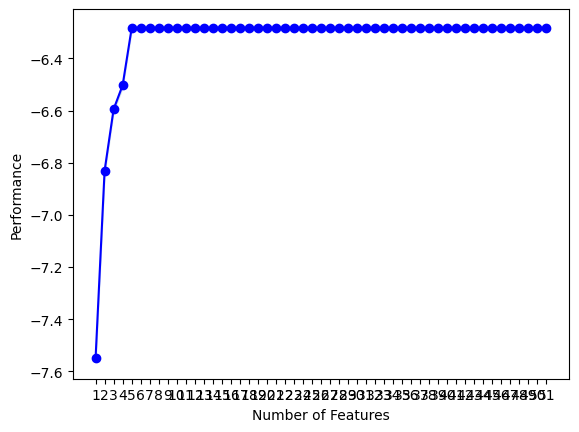

In [ ]:

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import pandas as pd
from mlxtend.feature_selection import SequentialFeatureSelector
sbs = SequentialFeatureSelector(LinearRegression(), forward=True,
                                k_features="best", scoring='neg_root_mean_squared_error')

sbs.fit(dx_train_prepd, dy_train)

print(f'feature combination {sbs.k_feature_idx_} gave best RMSE of {-sbs.k_score_:.0f}.\n')
display(pd.DataFrame.from_dict(sbs.get_metric_dict()).T)
plot_sfs(sbs.get_metric_dict(), kind='std_err');

### Model Evaluation with Selected Features by Sequential Feature Selection: Forward

In [ ]:
# Extract best features
selected_features_idx = list(sbs.k_feature_idx_)

# use this index apply to data
dx_train_selected_forward = dx_train_prepd[:, selected_features_idx]
dx_test_selected_forward = dx_test_prepd[:, selected_features_idx]

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(dx_train_selected_forward, dy_train)
pred_lin = lin_reg.predict(dx_test_selected_forward)
rmse = mean_squared_error(dy_test, pred_lin, squared=False)


    # Evaluate clf's accuracy on the test set
print("Linear Regressor's Root Mean Squared Error:", rmse)

Linear Regressor's Root Mean Squared Error: 6.274482356039964


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(dx_train_selected_forward, dy_train)
pred_rf = rf_reg.predict(dx_test_selected_forward)
rmse = mean_squared_error(dy_test, pred_rf, squared=False)


    # Evaluate clf's accuracy on the test set
print("Random Forest Regressor's Root Mean Squared Error:", rmse)

Random Forest Regressor's Root Mean Squared Error: 1.7975622731269043


After applying forward feature selection, the Linear Regression model achieved an RMSE of 6.27, while the Random Forest Regressor significantly outperformed it with an RMSE of 1.79. Although the Random Forest model did not perform as well as it did with SelectKBest, it still showed improvement compared to the Random Forest model without any feature selection.

### Hyper Parameters Tuning

In [ ]:
from sklearn.experimental import enable_halving_search_cv # needed to enable Halving features
from sklearn.model_selection import HalvingGridSearchCV
rfm_para_grid = {
                 'max_features' : ['sqrt', 'log2', None],
                 'n_estimators' : np.arange(10, 201, 30),
                 'min_samples_leaf' : np.arange(1, 50, 10)
                 }
halving_grid_search = HalvingGridSearchCV(RandomForestRegressor(), rfm_para_grid, min_resources='exhaust', scoring='neg_root_mean_squared_error', cv = 3)
halving_grid_search.fit(dx_train_selected_forward, dy_train)
print('The best parameters are ', halving_grid_search.best_params_)

halving_grid_cv_res = pd.DataFrame(halving_grid_search.cv_results_)  # convert to DF for convenience
# In the end, we care about performances in the last iteration (using most data)
# So, let's sort by iteration (descending), then by test score (descending)
halving_grid_cv_res.sort_values(by=['iter', 'mean_test_score'], ascending=False, inplace=True)
# and check the top few rows
halving_grid_cv_res.filter(regex = '(iter|^param_|mean_test_score|n_resources)', axis=1).head(30)

The best parameters are  {'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 190}


,iter,n_resources,param_max_features,param_min_samples_leaf,param_n_estimators,mean_test_score
156,4,510300,sqrt,1,190,-1.797033
157,4,510300,log2,1,190,-1.797879
155,3,170100,log2,1,190,-1.796152
154,3,170100,sqrt,1,190,-1.799615
153,3,170100,sqrt,1,130,-1.801531
152,3,170100,sqrt,1,100,-1.803003
144,2,56700,log2,1,190,-1.806701
146,2,56700,sqrt,1,190,-1.807285
142,2,56700,sqrt,1,130,-1.811631
145,2,56700,sqrt,1,100,-1.812214


## Feature Selection with Sequential Feature Selection: Backward

feature combination (4, 5, 6, 7, 8, 9, 10, 11, 15, 33) gave best RMSE of 6.



,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
51,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-6.293667073607611, -6.256653241824453, -6.28...",-6.28362,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.020509,0.015957,0.007978
50,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14,...","[-6.293611733988367, -6.25657121074613, -6.280...",-6.283577,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14,...",0.02051,0.015957,0.007979
49,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14,...","[-6.293569039830041, -6.256541271038415, -6.28...",-6.283534,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14,...",0.02049,0.015942,0.007971
48,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14,...","[-6.29349427855985, -6.256530455550865, -6.280...",-6.283512,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14,...",0.020486,0.015939,0.00797
47,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14,...","[-6.293467388928746, -6.256464119913011, -6.28...",-6.283491,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14,...",0.020508,0.015956,0.007978
46,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14,...","[-6.293479416256892, -6.256456331928513, -6.28...",-6.283484,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14,...",0.020503,0.015952,0.007976
45,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14,...","[-6.293538665074217, -6.256420931331099, -6.28...",-6.283457,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14,...",0.020524,0.015969,0.007984
44,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14,...","[-6.293529941603596, -6.256280424824552, -6.28...",-6.283439,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14,...",0.020585,0.016016,0.008008
43,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14,...","[-6.293480514443778, -6.256356441202984, -6.28...",-6.283444,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14,...",0.020545,0.015985,0.007992
42,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14,...","[-6.293479783283662, -6.256334637981626, -6.28...",-6.283426,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14,...",0.020556,0.015993,0.007997


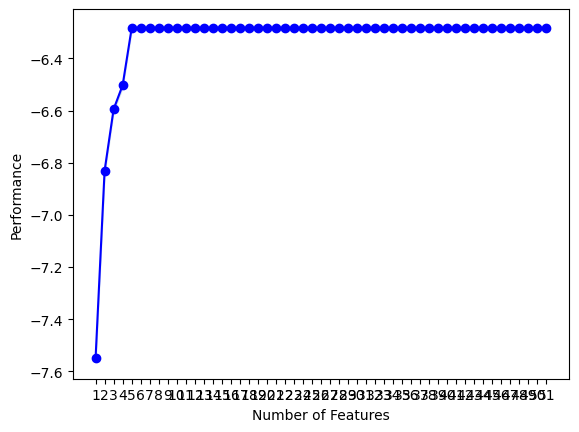

In [ ]:
column_names = [f"feature_{i}" for i in range(dx_train_prepd.shape[1])]  # Replace with actual names if available
dx_train_prepd_df = pd.DataFrame(dx_train_prepd, columns=column_names)

sbs = SequentialFeatureSelector(LinearRegression(), forward=False,
                                k_features="best", scoring='neg_root_mean_squared_error')

backward_preprocess_pipeline = Pipeline([
    ('prep', prep_pipeline),
    ('select', sbs),
])

backward_preprocess_pipeline.fit(dx_train_prepd_df, dy_train)

print(f'feature combination {sbs.k_feature_idx_} gave best RMSE of {-sbs.k_score_:.0f}.\n')
display(pd.DataFrame.from_dict(sbs.get_metric_dict()).T)
plot_sfs(sbs.get_metric_dict(), kind='std_err');

### Model Evaluation with Selected Features by Sequential Feature Selection: Backward

In [ ]:
# Extract best features
selected_features_idx = list(sbs.k_feature_idx_)

# use this index apply to data
dx_train_selected_backward = dx_train_prepd[:, selected_features_idx]
dx_test_selected_backward = dx_test_prepd[:, selected_features_idx]

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(dx_train_selected_backward, dy_train)
pred_lin = lin_reg.predict(dx_test_selected_backward)
rmse = mean_squared_error(dy_test, pred_lin, squared=False)


    # Evaluate clf's accuracy on the test set
print("Linear Regressor's Root Mean Squared Error:", rmse)

Linear Regressor's Root Mean Squared Error: 6.274482356039964


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(dx_train_selected_backward, dy_train)
pred_rf = rf_reg.predict(dx_test_selected_backward)
rmse = mean_squared_error(dy_test, pred_rf, squared=False)


    # Evaluate clf's accuracy on the test set
print("Random Forest Regressor's Root Mean Squared Error:", rmse)

Random Forest Regressor's Root Mean Squared Error: 1.7975140238075695


After backward feature selection, the linear regression model shows minimal improvement, with its RMSE remaining at approximately 6.27, similar to the preliminary model. This indicates that backward feature selection did not significantly impact the linear regression model's performance. On the other hand, the Random Forest Regressor demonstrates a slight improvement. The preliminary model's RMSE is around 1.82, which decreases to 1.79 after backward selection. This reduction suggests that removing some features improved the model's performance slightly, likely by eliminating redundant or irrelevant features.

### Hyper Parameters Tuning

In [ ]:
from sklearn.experimental import enable_halving_search_cv # needed to enable Halving features
from sklearn.model_selection import HalvingGridSearchCV
rfm_para_grid = {
    'max_features': ['sqrt', 'log2', None],
    'max_depth': np.arange(3, 20, 3),
    'n_estimators': np.arange(50, 301, 25),
    'min_samples_leaf': np.arange(1, 21, 3),
    'min_samples_split': np.arange(2, 20, 3),
    'bootstrap': [True, False]
}
halving_grid_search = HalvingGridSearchCV(RandomForestRegressor(), rfm_para_grid, min_resources='exhaust', scoring='neg_root_mean_squared_error', cv = 3)
halving_grid_search.fit(dx_train_selected_backward, dy_train)
print('The best parameters are ', halving_grid_search.best_params_)

halving_grid_cv_res = pd.DataFrame(halving_grid_search.cv_results_)  # convert to DF for convenience
# In the end, we care about performances in the last iteration (using most data)
# So, let's sort by iteration (descending), then by test score (descending)
halving_grid_cv_res.sort_values(by=['iter', 'mean_test_score'], ascending=False, inplace=True)
# and check the top few rows
halving_grid_cv_res.filter(regex = '(iter|^param_|mean_test_score|n_resources)', axis=1).head(30)

The best parameters are  {'bootstrap': False, 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 300}


,iter,n_resources,param_bootstrap,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_test_score
24948,8,505197,False,15,log2,1,8,300,-1.674805
24947,8,505197,True,12,None,1,8,75,-1.683556
24946,8,505197,False,12,sqrt,1,5,275,-1.717575
24944,7,168399,False,15,log2,1,8,300,-1.715575
24945,7,168399,True,12,None,1,8,75,-1.721459
24938,7,168399,False,12,sqrt,1,5,275,-1.740880
24943,7,168399,False,12,log2,1,5,275,-1.741015
24940,7,168399,False,12,sqrt,1,5,150,-1.741414
24942,7,168399,False,12,log2,1,5,225,-1.741713
24941,7,168399,False,12,log2,1,5,250,-1.742244


After halving grid search, we found that its performance is slightly better than forward selection, but SelectKBest still performs best.

## Evaluate Best Model on Test Set

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(dx_train_selected, dy_train)
pred_rf = rf_reg.predict(dx_test_selected)
rmse = mean_squared_error(dy_test, pred_rf, squared=False)


    # Evaluate clf's accuracy on the test set

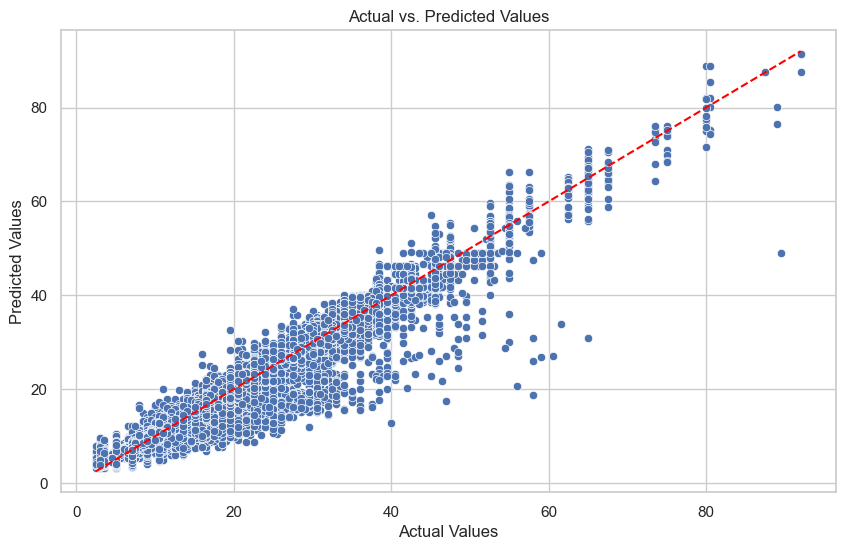

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=dy_test, y=pred_rf)
plt.plot([min(dy_test), max(dy_test)], [min(dy_test), max(dy_test)], color='red', linestyle='--')  # 对角线
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

The model demonstrates good performance, most points cluster around the red line, indicating the model generally predicts values close to the actual values with a few outliers, which suggests areas where model accuracy could be improved.

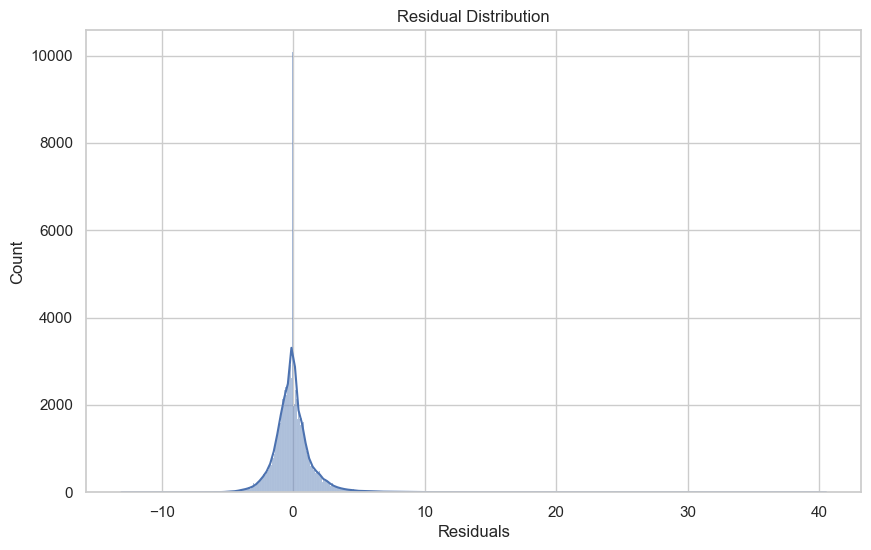

In [ ]:
residuals = dy_test - pred_rf

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Residual Distribution')
plt.show()


This graph shows the residual distribution of a model. The residuals are centered around 0, indicating the model's unbiased predictions. The narrow and slightly skewed distribution suggests most residuals are small but with some outliers.

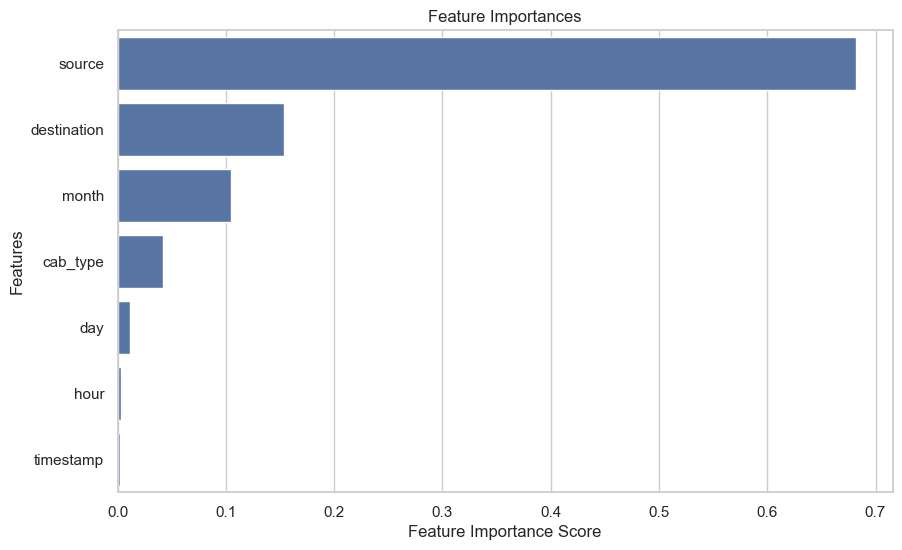

In [ ]:
import numpy as np

feature_importances = rf_reg.feature_importances_
features = dx_train.columns

# sequence the importances of features
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[indices], y=features[indices])
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

The "source" feature has the highest importance by a significant margin, indicating that the origin location plays the most critical role in predicting the target variable. This suggests that pricing or other outputs are highly location-dependent. Follow by the "destination" and "month" features are the next most important. This highlights where people travel to and the time of year also significantly impacts the predictions. Besides, It should be noted that the correlation matrix reveals a strong correlation between "month" and "timestamp" (0.77), aligning with our finding that "month" is a key driver.
All in all, The model heavily relies on "source," "destination," and "month" to make predictions, underscoring the need for location and time-specific optimizations.

## Challenges

The challenges we face include managing a large number of columns, which makes feature selection, model training, and hyperparameter tuning computationally expensive. To address this, we use a label encoder instead of one hot encoder due to the large number of attributes in categorical columns. Label encoding reduces the dimensionality of the dataset, but since it cannot be directly fitted into a pipeline due to its nature, it requires additional preprocessing steps. To optimize time and resource usage, we increase the steps in grid search, halving grid search, and halving random search for hyperparameter tuning, allowing us to efficiently explore a wider parameter space. Furthermore, we adopt forward selection, backward selection, and SelectKBest for feature selection to prioritize the most impactful features and use cross-validation to prevent overfitting and ensure the generalizability of the model. These techniques together aim to balance computational efficiency with model performance.

## Conclusion

Compared to SVM and Linear Regression, Random Forest achieved the best RMSE while maintaining a reasonable computational time. Although the performance of SVM was comparable to that of Random Forest, its runtime was approximately ten times longer. Therefore, Random Forest demonstrated the most favorable performance among the three models.

For feature selection, we experimented with SelectKBest, forward feature selection, and backward feature selection. Interestingly, SelectKBest outperformed the others, which slightly deviated from our expectations. However, considering the information provided by the correlation metrics, this result is understandable since there appears to be minimal correlation between the features.

Regarding hyperparameter tuning, we initially employed grid search, halving grid search, and randomized search. While grid search delivered the best results, it posed a significant challenge due to its lengthy runtime, and some trials took over three days without completion. Consequently, we primarily adopted halving grid search to balance runtime and optimization quality. Notably, we observed that hyperparameter tuning had less impact on model performance after feature selection. This could be attributed to the narrower search range, which is inherently tied to runtime constraints.

Finally, based on our best model, the predicted prices achieved high accuracy with reduced error. This model could benefit third party ride-sharing companies looking to enter the market, as it provides accurate pricing predictions. Additionally, by leveraging the insights from our feature importance analysis, companies could adjust their pricing strategies to differentiate themselves from existing competitors.

## Reference
1. [47 Lyft Statistics in 2024: Data on Revenue, Riders & Drivers](https://financesonline.com/lyft-statistics/)
2. [Thanksgiving Airport Ride Prices Vary By 37%, New Data Shows](https://www.prfire.com/news-releases/thanksgiving-airport-ride-prices-vary-by-37-new-data-shows/)

##Convert to PDF

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Install required packages for PDF conversion -- could take over a minute
!apt update > /dev/null 2>&1
!apt install texlive-xetex pandoc > /dev/null 2>&1
!pip install nbconvert > /dev/null 2>&1

import re, pathlib, shutil
notebook_path = 'drive/MyDrive' # ← CHANGE THIS TO THE FOLDER ON GOOGLE DRIVE WITH YOUR COLAB NOTEBOOK
notebook_name = 'Ride_Sharing_Price_Prediction.ipynb' # ← CHANGE THIS TO THE NAME OF YOUR COLAB NOTEBOOK
!jupyter nbconvert "{notebook_path}/{notebook_name}" --to pdf --output-dir "{notebook_path}"

# Optionally, download the exported PDF
from google.colab import files
pdf_name = notebook_path + '/' + notebook_name.replace('.ipynb', '.pdf')
files.download(pdf_name)

# Do review the pdf file to make sure everything is appearing correctly before submitting!

[NbConvertApp] Converting notebook drive/MyDrive/Ride_Sharing_Price_Prediction.ipynb to pdf
[NbConvertApp] Support files will be in Ride_Sharing_Price_Prediction_files/
[NbConvertApp] Making directory ./Ride_Sharing_Price_Prediction_files
[NbConvertApp] Writing 185994 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 715870 bytes to drive/MyDrive/Ride_Sharing_Price_Prediction.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>